# Pandas e Scikit-Learn
Este notebook ensina passo a passo como usar **pandas** e **scikit-learn** para trabalhar com dados e fazer predições.

foi usado a base de dados: https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv


## 1. Importando bibliotecas
- `pandas` → manipulação de tabelas de dados.
- `numpy` → operações matemáticas.
- `train_test_split` → separa treino e teste.
- `LinearRegression`, `RandomForestRegressor` → modelos de aprendizado de máquina.
- `mean_squared_error`, `r2_score` → métricas de avaliação.
- `StandardScaler` → normalização de dados.
- `Pipeline` → encadeamento de pré-processamento e modelo.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


## 2. Carregando os dados
- `caminho_arquivo_csv` → caminho do dataset.
- `dados_carros` → DataFrame com os dados dos carros.


In [2]:
caminho_arquivo_csv = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados_carros = pd.read_csv(caminho_arquivo_csv)
dados_carros.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


## 3. Explorando os dados
- `informacoes_dados_carros` → tipos de dados e valores nulos.
- `estatisticas_dados_carros` → estatísticas descritivas.
- `colunas_dados_carros` → lista de colunas disponíveis.


In [3]:
informacoes_dados_carros = dados_carros.info()
estatisticas_dados_carros = dados_carros.describe()
colunas_dados_carros = dados_carros.columns
estatisticas_dados_carros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10000 non-null  int64  
 1   mileage_per_year  10000 non-null  int64  
 2   model_year        10000 non-null  int64  
 3   price             10000 non-null  float64
 4   sold              10000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 390.8+ KB


,Unnamed: 0,mileage_per_year,model_year,price
count,10000.00000,10000.000000,10000.00000,10000.000000
mean,4999.50000,14183.391200,2004.14420,64842.373698
std,2886.89568,5008.571422,4.68758,25250.592393
min,0.00000,363.000000,1998.00000,-840.360000
25%,2499.75000,10474.750000,2000.00000,44796.375000
50%,4999.50000,13418.500000,2003.00000,65225.685000
75%,7499.25000,17176.750000,2007.00000,85111.237500
max,9999.00000,39572.000000,2017.00000,118929.720000


## 4. Preparando features e target
- `dados_carros["sold"] = dados_carros["sold"].map({"yes": 1, "no": 0})` → remove strings que podem ser mais complexas de se trabalhar.
- `coluna_alvo_preco` → variável que queremos prever (preço).
- `variaveis_explicativas` → todas as colunas menos o preço.
- `valores_X` → matriz de entrada (features).
- `valores_y` → vetor de saída (target).


In [4]:
dados_carros["sold"] = dados_carros["sold"].map({"yes": 1, "no": 0})
coluna_alvo_preco = "price"
variaveis_explicativas = dados_carros.drop(columns=[coluna_alvo_preco])
valores_X = variaveis_explicativas
valores_y = dados_carros[coluna_alvo_preco]
valores_X.head()

,Unnamed: 0,mileage_per_year,model_year,sold
0,0,21801,2000,1
1,1,7843,1998,1
2,2,7109,2006,0
3,3,26823,2015,0
4,4,7935,2014,1


## 5. Dividindo em treino e teste
- `X_treino`, `X_teste` → dados de entrada separados.
- `y_treino`, `y_teste` → rótulos separados.


In [5]:
X_treino, X_teste, y_treino, y_teste = train_test_split(valores_X, valores_y, test_size=0.2, random_state=42)
X_treino.shape, X_teste.shape

((8000, 4), (2000, 4))

## 6. Regressão Linear
- `modelo_regressao_linear` → instância do modelo.
- `modelo_regressao_linear_ajustado` → modelo treinado.
- `predicoes_regressao_linear` → previsões feitas.
- `erro_quadratico_medio_regressao_linear`, `r2_regressao_linear` → métricas.


In [6]:
modelo_regressao_linear = LinearRegression()
modelo_regressao_linear_ajustado = modelo_regressao_linear.fit(X_treino, y_treino)
predicoes_regressao_linear = modelo_regressao_linear_ajustado.predict(X_teste)
erro_quadratico_medio_regressao_linear = mean_squared_error(y_teste, predicoes_regressao_linear)
r2_regressao_linear = r2_score(y_teste, predicoes_regressao_linear)
erro_quadratico_medio_regressao_linear, r2_regressao_linear

(526930954.8691715, 0.20619308147012405)

## 7. Random Forest Regressor
- `modelo_random_forest` → instância do modelo.
- `modelo_random_forest_ajustado` → modelo treinado.
- `predicoes_random_forest` → previsões feitas.
- `erro_quadratico_medio_random_forest`, `r2_random_forest` → métricas.


In [7]:
modelo_random_forest = RandomForestRegressor(random_state=42)
modelo_random_forest_ajustado = modelo_random_forest.fit(X_treino, y_treino)
predicoes_random_forest = modelo_random_forest_ajustado.predict(X_teste)
erro_quadratico_medio_random_forest = mean_squared_error(y_teste, predicoes_random_forest)
r2_random_forest = r2_score(y_teste, predicoes_random_forest)
erro_quadratico_medio_random_forest, r2_random_forest

(568787239.4368687, 0.14313774572496418)

## 8. Pipeline com normalização
- `pipeline_regressao_linear_normalizada` → pipeline que padroniza os dados antes do modelo.
- `pipeline_regressao_linear_ajustado` → pipeline treinado.
- `predicoes_pipeline_regressao_linear` → previsões feitas.
- `erro_quadratico_medio_pipeline`, `r2_pipeline` → métricas.


In [8]:
pipeline_regressao_linear_normalizada = Pipeline([
    ('escalonador', StandardScaler()),
    ('modelo', LinearRegression())
])
pipeline_regressao_linear_ajustado = pipeline_regressao_linear_normalizada.fit(X_treino, y_treino)
predicoes_pipeline_regressao_linear = pipeline_regressao_linear_ajustado.predict(X_teste)
erro_quadratico_medio_pipeline = mean_squared_error(y_teste, predicoes_pipeline_regressao_linear)
r2_pipeline = r2_score(y_teste, predicoes_pipeline_regressao_linear)
erro_quadratico_medio_pipeline, r2_pipeline

(526930954.8691703, 0.20619308147012594)

## 9. Conclusão
- Exploramos os dados com Pandas.
- Preparamos features e target.
- Dividimos em treino e teste.
- Treinamos modelos (Regressão Linear e Random Forest).
- Avaliamos os resultados com MSE e R².
- Criamos um Pipeline com normalização.

Isso cobre uma base sólida para trabalhar com **scikit-learn** e **pandas** em problemas de predição.

## Glossário das metricas

### Regressão
- **MAE (Mean Absolute Error)** → erro médio absoluto; quanto menor, melhor.
- **MSE (Mean Squared Error)** → erro médio quadrático; penaliza mais erros grandes.
- **RMSE (Root Mean Squared Error)** → raiz do MSE; mesma unidade do target.
- **R² (Coeficiente de Determinação)** → varia de -∞ até 1; mede o quanto o modelo explica a variância dos dados.

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Exemplo para regressão (previsão de preço)
mae_regressao = mean_absolute_error(y_teste, predicoes_regressao_linear)
mse_regressao = mean_squared_error(y_teste, predicoes_regressao_linear)
#rmse_regressao = mean_squared_error(y_teste, predicoes_regressao_linear, squared=False)
r2_regressao = r2_score(y_teste, predicoes_regressao_linear)

mae_regressao, mse_regressao, r2_regressao #,rmse_regressao


(18468.0324815797, 526930954.8691715, 0.20619308147012405)

### Classificação
- **Acurácia** → % de acertos (boa quando dados estão balanceados).
- **Precisão (Precision)** → dos positivos preditos, quantos realmente são positivos.
- **Revocação (Recall)** → dos positivos reais, quantos o modelo conseguiu encontrar.
- **F1-Score** → média harmônica entre precisão e recall; útil quando classes estão desbalanceadas.
- **Matriz de confusão** → tabela que mostra acertos e erros por classe.

## 10. Outros usos

### Preparando features e target (classificação corrigido)
- `coluna_alvo_sold` → target que queremos prever (`sold`).
- `colunas_usadas_para_classificacao` → features realmente existentes no dataset.


In [10]:
coluna_alvo_sold = "sold"

colunas_usadas_para_classificacao = ["price", "model_year", "mileage_per_year"]

variaveis_explicativas_classificacao = dados_carros[colunas_usadas_para_classificacao]
valores_X_classificacao = variaveis_explicativas_classificacao
valores_y_classificacao = dados_carros[coluna_alvo_sold]


### Visualizando a árvore do Random Forest
- `arvore_um_random_forest` → seleciona a primeira árvore da floresta.
- `plot_tree` → função do sklearn para exibir a árvore.


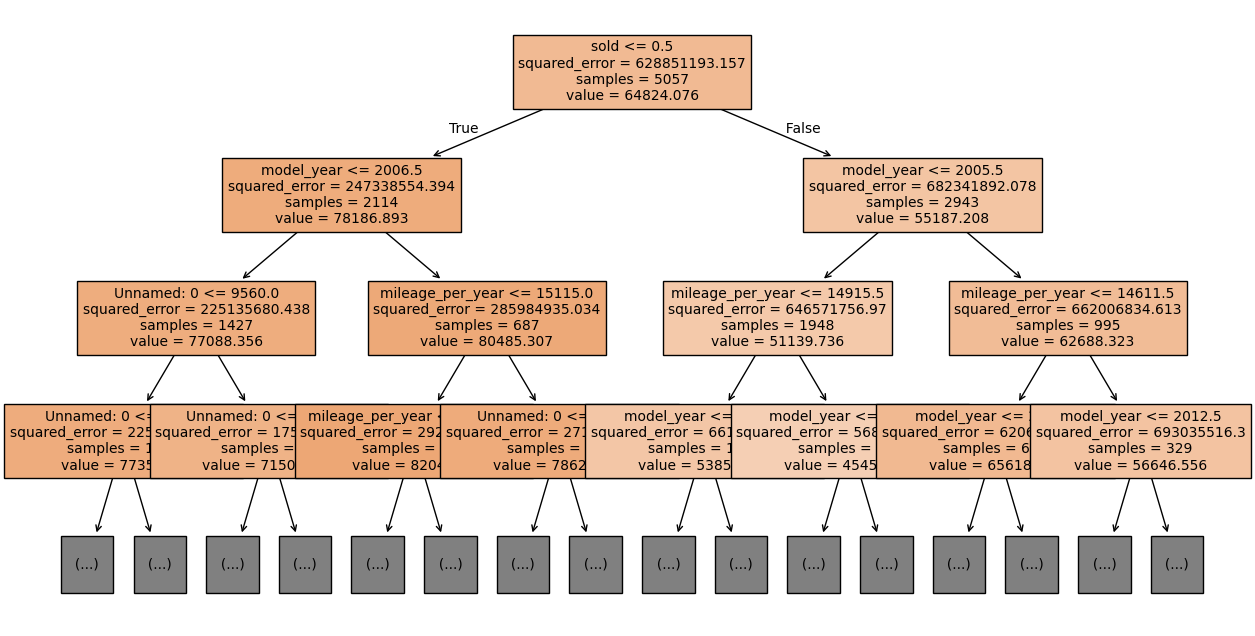

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

arvore_um_random_forest = modelo_random_forest_ajustado.estimators_[0]

plt.figure(figsize=(15, 8))
plot_tree(arvore_um_random_forest,
          feature_names=valores_X.columns,
          filled=True,
          max_depth=3,
          fontsize=10)
plt.show()


### Importância das variáveis
- `importancia_variaveis_random_forest` → valores numéricos da importância.
- `tabela_importancia_variaveis` → DataFrame organizado com os resultados.


In [12]:
importancia_variaveis_random_forest = modelo_random_forest_ajustado.feature_importances_

tabela_importancia_variaveis = pd.DataFrame({
    "variavel": valores_X.columns,
    "importancia": importancia_variaveis_random_forest
}).sort_values(by="importancia", ascending=False)

tabela_importancia_variaveis


,variavel,importancia
1,mileage_per_year,0.343944
0,Unnamed: 0,0.330040
3,sold,0.198029
2,model_year,0.127987


### Comparando valores reais e previstos
- `y_teste` → valores reais do preço.
- `predicoes_random_forest` → valores previstos pelo modelo.
- Gráfico de dispersão ajuda a ver se as previsões estão próximas da linha perfeita.


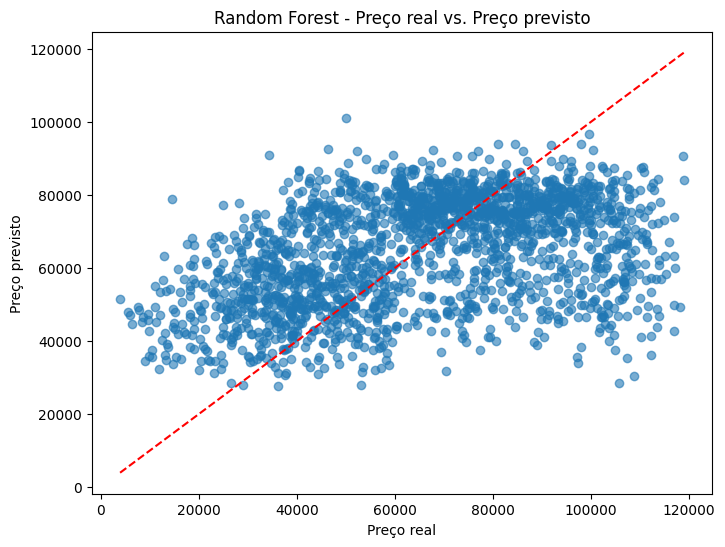

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_teste, predicoes_random_forest, alpha=0.6)
plt.plot([y_teste.min(), y_teste.max()],
         [y_teste.min(), y_teste.max()],
         "r--") 
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.title("Random Forest - Preço real vs. Preço previsto")
plt.show()


### Salvando e carregando o modelo
- `joblib.dump` → salva modelo em arquivo.
- `joblib.load` → carrega modelo já treinado.


In [14]:
import joblib

joblib.dump(modelo_random_forest_ajustado, "modelo_random_forest.pkl")
modelo_carregado = joblib.load("modelo_random_forest.pkl")


### Importância das variáveis
- Alguns modelos (como Random Forest) conseguem mostrar a importância relativa de cada variável.
- Isso ajuda a interpretar o que mais influencia no resultado.


In [15]:
len(colunas_usadas_para_classificacao), len(modelo_random_forest.feature_importances_)

(3, 4)

In [16]:
importancia_features = modelo_random_forest.feature_importances_
features_importancia_df = pd.DataFrame({
    "feature": coluna_alvo_sold,
    "importancia": importancia_features
}).sort_values(by="importancia", ascending=False)

features_importancia_df


,feature,importancia
1,sold,0.343944
0,sold,0.330040
3,sold,0.198029
2,sold,0.127987


### Validação Cruzada
- Divide os dados em várias partes (folds).
- O modelo é treinado em `k-1` folds e testado no fold restante.
- Dá uma avaliação mais robusta do desempenho.


In [17]:
from sklearn.model_selection import cross_val_score

scores_cv = cross_val_score(modelo_random_forest, valores_X_classificacao, valores_y_classificacao, cv=5)
scores_cv.mean(), scores_cv


(0.3515286622162952,
 array([0.33360745, 0.37056735, 0.35728706, 0.35009385, 0.3460876 ]))

### Normalização / Padronização
- Útil quando variáveis têm escalas muito diferentes.
- **StandardScaler** → transforma para média 0 e desvio 1.
- **MinMaxScaler** → transforma para [0,1].


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
valores_X_classificacao_normalizado = scaler.fit_transform(valores_X_classificacao)

modelo_logistico_normalizado = LogisticRegression(max_iter=1000)
scores_cv_normalizado = cross_val_score(modelo_logistico_normalizado, valores_X_classificacao_normalizado, valores_y_classificacao, cv=5)
scores_cv_normalizado.mean()


0.7036